## Automated Inventory Analysis Report - Identifying Low Quantity Products

The inventory analysis program was developed to automate the process of identifying products that are low in quantity. The program analyzes data from the inventory sheet, and based on pre-defined numerical parameters, outputs a report in Word format listing the products that fall below the specified thresholds. The program uses the Python programming language and the Pandas library to manipulate and analyze the data, and the python-docx library to generate the Word document. The program saves time and reduces errors by automating a previously manual and time-consuming process, and provides an efficient way to identify low inventory products.

In [2]:
# Import the data into a pandas dataframe
import pandas as pd

df = pd.read_excel("inventory_wb_1.xlsm")
df.head()

,product_id,Description,Product,Brand,Category,Storage,Packages,Units per Pack,Size,Individual Units,Total Units
0,898,KENS +MAYO XHVY TFF GF,Mayonneise,KENS,Dressing,Dry,3,4,1 GA,2,14
1,3113,VEGALENE PAN COATING VEG BLND AERO,Pan Coating,VEGALENE,Naan,Dry,2,6,14 oz,4,16
2,27182,SMUCKERS JAM STRWBRRY CUP TFF GF,Strawberry Jelly,SMUCKERS,Condiment,Dry,10,200,0.5 oz,100,2100
3,28051,BARILLA PASTA ZITI TFF,Pasta Ziti,BARILLA,Pasta,Dry,6,2,10 LB,1,13
4,28059,BARILLA PASTA PENNE RIGATE TFF,Pasta Penne,BARILLA,Pasta,Dry,11,2,10 lb,1,23


In [9]:
# check for the unique values for the parameters section
list_unique_categories = list(df["Category"].unique())
list_unique_categories

['Dressing',
 'Naan',
 'Condiment',
 'Pasta',
 'Candy',
 'Cereal',
 'Tuna',
 'Canned',
 'Chips',
 'Fruit',
 'Bread',
 'Veggies',
 'Lemonade',
 'Coffee']

### Creating a DataFrame based on Conditions

In [16]:
df_parameters = pd.DataFrame(df["Category"].unique(), columns=["Category"])
df_parameters["Urgent"] = 0
df_parameters["Warning"] = 0


cat_dict = {"Dressing": (2, 4),
            "Naan": (100, 200),
            "Condiment": (100, 200),
            "Pasta": (2, 5),
            "Candy": (2, 4),
            "Cereal": (2, 5),
            "Tuna": (3, 6),
            "Canned": (2, 4),
            "Chips": (3, 6),
            "Fruit": (3, 6),
            "Bread": (3, 6),
            "Veggies": (2, 4),
            "Lemonade": (3, 6),
            "Coffee": (5, 10)}

# iterate over each category in dataframe
for idx, row in df_parameters.iterrows():
    category = row["Category"]
    # set "Urgent" and "Warning" values based on category name
    df_parameters.loc[idx, "Urgent"] = cat_dict[category][0]
    df_parameters.loc[idx, "Warning"] = cat_dict[category][1]


df_parameters

,Category,Urgent,Warning
0,Dressing,2,4
1,Naan,100,200
2,Condiment,100,200
3,Pasta,2,5
4,Candy,2,4
5,Cereal,2,5
6,Tuna,3,6
7,Canned,2,4
8,Chips,3,6
9,Fruit,3,6


In [21]:
# Iterate through the rows in df
for index, row in df.iterrows():
    # Get the category of the current row
    category = row['Category']
    
    # Get the warning value for the current category from parameters
    warning_value = df_parameters.loc[df_parameters['Category'] == category, 'Warning'].iloc[0]
    urgent_value = df_parameters.loc[df_parameters['Category'] == category, 'Urgent'].iloc[0]
    
    # Get the total units for the current row
    total_units = row['Total Units']
    
    # Compare the total units with the warning value and display a message if necessary
    if total_units < urgent_value:
        print(f"Urgent: Total Units for {category} is {total_units}, which is less than the warning value of {urgent_value}.")    
    elif total_units < warning_value:
        print(f"Warning: Total Units for {category} is {total_units}, which is less than the warning value of {warning_value}.")
        
        

Urgent: Total Units for Naan is 16, which is less than the warning value of 100.


### Get output into a Word Formatted Document

In [23]:
pip install python-docx


     |████████████████████████████████| 5.6 MB 2.7 MB/s eta 0:00:01
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=2ee1eb798840b5be32ccb1aa335b9df9beb20093e5c0dbc5eb34a90bb3fc9d13
  Stored in directory: /Users/enzovillafuerte/Library/Caches/pip/wheels/83/8b/7c/09ae60c42c7ba4ed2dddaf2b8b9186cb105255856d6ed3dba5
Successfully built python-docx
Note: you may need to restart the kernel to use updated packages.


In [24]:
from datetime import datetime
import docx

# Create a new Word document
document = docx.Document()

# Get the current date and time
now = datetime.now()

# Format the date and time as a string that can be used in a file name
date_string = now.strftime("%Y-%m-%d_%H-%M-%S")

# Set the file name to include the current date and time
file_name = f"Automated Daily Report {date_string}.docx"

# Add a heading to the document with the current date
document.add_heading(f"Automated Daily Report ({now.strftime('%m/%d/%Y %I:%M %p')})", level=0)

# Iterate through the rows in df
for index, row in df.iterrows():
    # Get the category of the current row
    category = row['Category']
    
    # Get the warning value for the current category from parameters
    warning_value = df_parameters.loc[df_parameters['Category'] == category, 'Warning'].iloc[0]
    urgent_value = df_parameters.loc[df_parameters['Category'] == category, 'Urgent'].iloc[0]
    
    # Get the total units for the current row
    total_units = row['Total Units']
    
    # Compare the total units with the warning value and display a message if necessary
    if total_units < urgent_value:
        document.add_paragraph(f"Urgent: Total Units for {category} is {total_units}, which is less than the warning value of {urgent_value}.")
    elif total_units < warning_value:
        document.add_paragraph(f"Warning: Total Units for {category} is {total_units}, which is less than the warning value of {warning_value}.")

# Save the document
document.save(file_name)


### Output Example (Word Document)

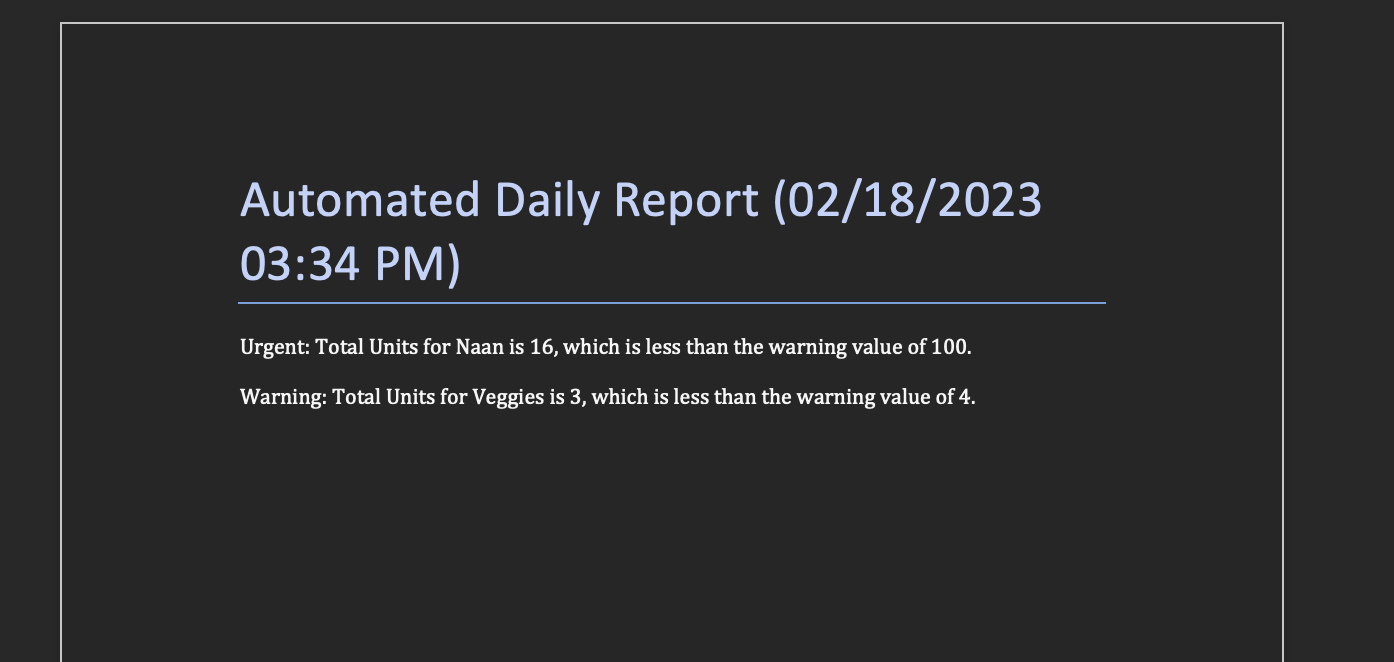